In [1]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

%matplotlib inline

statevector_simulator = q.Aer.get_backend('statevector_simulator')
qasm_sim = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.n_qubits
    
    circuit.measure([i for i in range(n_qubits)], [i for i in range(len(circuit.clbits))])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

<ipython-input-1-d1a18b5e2c04>:14: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  n_qubits = circuit.n_qubits


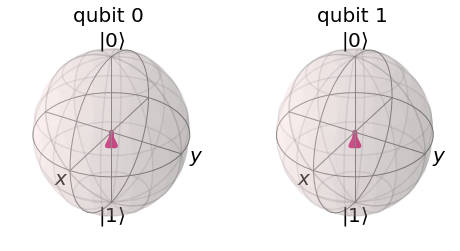

In [2]:
circuit = q.QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

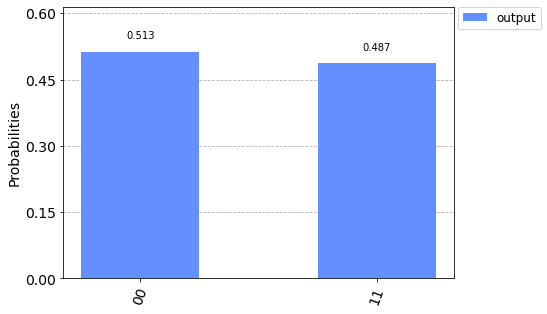

In [3]:
plot_histogram([counts], legend=['output'])

In [4]:
circuit = q.QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)
circuit.draw()


┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 3/══════════

<ipython-input-1-d1a18b5e2c04>:14: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  n_qubits = circuit.n_qubits


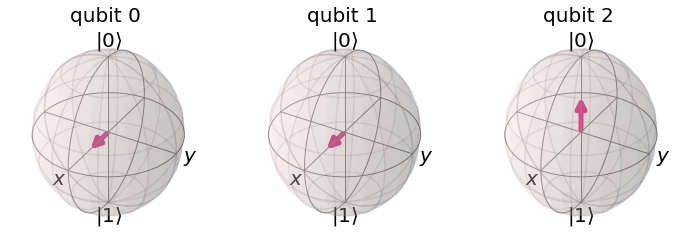

In [5]:
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

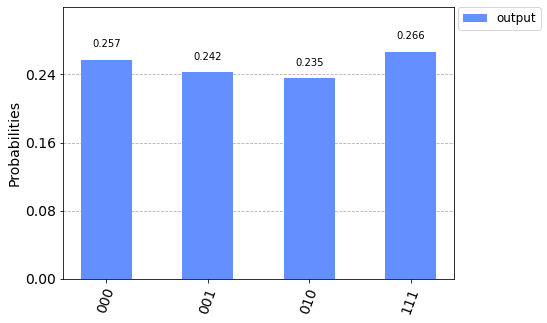

In [6]:
plot_histogram([counts], legend=['output'])

In [7]:
circuit = q.QuantumCircuit(3, 1)
circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)
circuit.measure([2], [0])
circuit.draw()

┌───┐        
q_0: ┤ H ├──■─────
     ├───┤  │     
q_1: ┤ H ├──■─────
     └───┘┌─┴─┐┌─┐
q_2: ─────┤ X ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

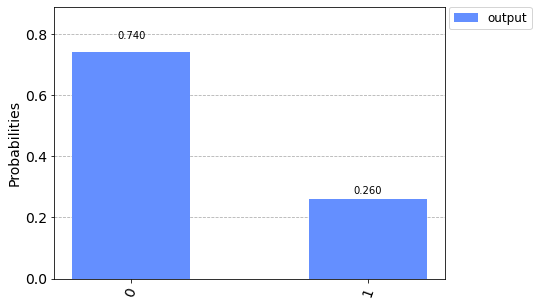

In [8]:
qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = qasm_job.get_counts()
plot_histogram([counts], legend=['output'])

In [9]:
import math
circuit = q.QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
circuit.rx(math.pi/4, 2)

circuit.draw()

┌───┐    
q_0: ───┤ H ├────
        ├───┤    
q_1: ───┤ H ├────
     ┌──┴───┴───┐
q_2: ┤ RX(pi/4) ├
     └──────────┘
c: 3/════════════

<ipython-input-1-d1a18b5e2c04>:14: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  n_qubits = circuit.n_qubits


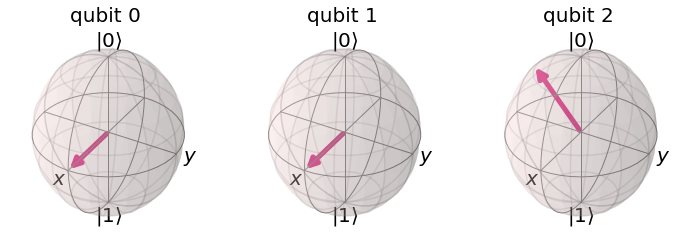

In [10]:
statevec, count = do_job(circuit)
plot_bloch_multivector(statevec)

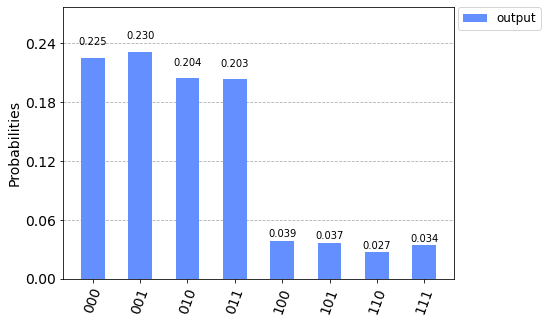

In [14]:
plot_histogram([count], legend=['output'])

In [21]:
import math
circuit = q.QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
circuit.cry(math.pi/4, 2, 0)

circuit.draw()

┌───┐┌──────────┐
q_0: ┤ H ├┤ RY(pi/4) ├
     ├───┤└────┬─────┘
q_1: ┤ H ├─────┼──────
     └───┘     │      
q_2: ──────────■──────
                      
c: 3/═════════════════

<ipython-input-1-d1a18b5e2c04>:14: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  n_qubits = circuit.n_qubits


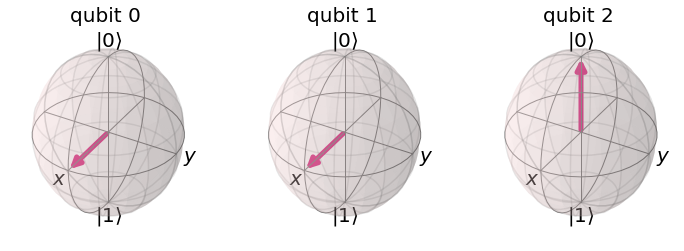

In [22]:
statevec, count = do_job(circuit)
plot_bloch_multivector(statevec)